<a href="https://colab.research.google.com/github/bvo4/Project-2/blob/main/bdv9527_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import sklearn
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [84]:
data = pd.read_csv('https://raw.githubusercontent.com/bvo4/TEMP/main/data_upload.csv', on_bad_lines='skip')
print (data)

labels = ['3DES', 'AES', 'IDEA', 'SIMON', 'Threefish']
features = ['Age', 'Memory', 'Constraint', 'Security', 'Simple', 'Usage']

unique_values = {
    'Age': ['old', 'new'],
    'Memory': ['yes', 'no'],
    'Constraint':['yes', 'no'],
    'Security': ['Security', 'Speed'],
    'Simple': ['Simple', 'Complex'],
    'Usage': ['Yes', 'No']
}

#print(data.head())
print(data)

    Age Memory Constraint  Security   Simple Usage     Scheme
0   Yes     No         No  Security   Simple   Yes       3DES
1   Yes     No        Yes  Security   Simple   Yes       3DES
2   Yes    Yes        Yes  Security   Simple   Yes       3DES
3   Yes    Yes        Yes     Speed   Simple    No        AES
4   Yes    Yes         No     Speed   Simple   Yes        AES
5   Yes     No         No     Speed   Simple    No        AES
6   Yes    Yes        Yes  Security   Simple   Yes        AES
7   Yes    Yes         No  Security   Simple   Yes        AES
8   Yes     No         No  Security   Simple    No        AES
9    No    Yes        Yes  Security  Complex    No       IDEA
10   No     No        Yes  Security  Complex   Yes       IDEA
11   No    Yes        Yes  Security  Complex   Yes       IDEA
12   No     No        Yes  Security  Complex   Yes       IDEA
13   No     No        Yes  Security  Complex    No       IDEA
14   No    Yes        Yes  Security   Simple    No      SIMON
15   No 

In [85]:
X_train = data[features]
Y_TRAIN = data['Scheme']

In [86]:
from dataclasses import dataclass
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def encode_data(data):
  le = preprocessing.LabelEncoder()
  data = data.apply(le.fit_transform)
  return data

# Function to split the dataset
def splitdataset(data):
  
    # Separating the target variable
    X = data.values[:, 0:6]
    Y = data.values[:, 6]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
    return X, Y, X_train, X_test, y_train, y_test

data = encode_data(data)

X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
splitdataset(data)

scheme_mapping = {'3DES': 1, 'AES': 2, 'IDEA': 3, 'Simon': 4,'Threefish': 5}


In [87]:
from sklearn import tree
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

[Text(0.5, 0.9, 'Age <= 0.5\ngini = 0.773\nsamples = 16\nvalue = [3, 5, 2, 4, 2]\nclass = AES'),
 Text(0.3, 0.7, 'Simple <= 0.5\ngini = 0.625\nsamples = 8\nvalue = [0, 0, 2, 4, 2]\nclass = SIMON'),
 Text(0.2, 0.5, 'Security <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [0, 0, 2, 0, 2]\nclass = IDEA'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = IDEA'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Threefish'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]\nclass = SIMON'),
 Text(0.7, 0.7, 'Usage <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5, 0, 0, 0]\nclass = AES'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]\nclass = AES'),
 Text(0.8, 0.5, 'Constraint <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0, 0, 0]\nclass = 3DES'),
 Text(0.7, 0.3, 'Memory <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0, 0]\nclass = AES'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]

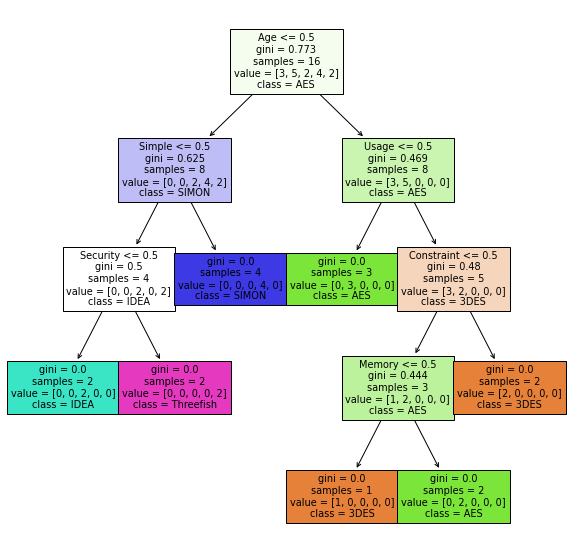

In [88]:
from matplotlib import pyplot as plt
fix, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=features, class_names=labels, ax=ax, filled=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Function to calculate accuracy
def cal_accuracy(X_test, y_test, y_pred):
    metrics.confusion_matrix(y_pred, y_test)

    print("Confusion Matrix: ",
        confusion_matrix(y_pred, y_test))
      
    print ("Accuracy : ",
    accuracy_score(y_pred,y_test)*100)

#    print("Report : ",
#    classification_report(rounded_labels, y_pred))

score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("PREDICTION: " + str(y_pred))
print(score)

cal_accuracy(X_test, y_test, y_pred)

PREDICTION: [1 1 1 3 2 0 0]
0.5714285714285714
Confusion Matrix:  [[1 0 0 0 1]
 [0 1 0 2 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]
Accuracy :  57.14285714285714
